# Plots for paper

In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import sys
try:
    sys.path.remove("../py_src") # Hacky way to add higher directory to python modules path. 
except:
    pass
sys.path.append("../py_src") # Means that I dont have to make src/ a proper python package

In [1]:

import matplotlib.pyplot as plt 

import numpy as np 
import json
import pandas as pd 
import corner
import scienceplots


def load_data(path,variables_to_plot):

    df_posterior = pd.read_parquet(path)  
    return df_posterior[variables_to_plot]

In [10]:
import glob 
list_of_files = sorted(glob.glob("../data/nested_sampling/data_for_manuscript/compressed_files/*shifted_prior*.parquet.gzip")) #stored on Ozstar paper_multiple_noise_realisations_shifted_h_prior
parameters = ["omega_gw","phi0_gw","psi_gw","iota_gw","delta_gw","alpha_gw","h"]



list_of_files = list_of_files[0:100] #select a subset to aboid doing pairwise stuff for ages

In [12]:
#Process all files 


parameters = ["omega_gw","phi0_gw","psi_gw","iota_gw","delta_gw","alpha_gw","h",]

all_arrays = []
i=0
for f in list_of_files:
    #print(i)
    df = load_data(f,parameters)
    numpy_array = df.to_numpy()
    all_arrays.extend([numpy_array])

    i+=1

print("saving")
numpyify = np.array(all_arrays, dtype=object)
outfile = '../data/pairwise_wasserstein_large_h'
np.save(outfile, numpyify)



saving


In [13]:
import numpy as np 
new_data = np.load('../data/pairwise_wasserstein_large_h.npy',allow_pickle=True)

In [14]:
import itertools
indexes = list(itertools.combinations(range(len(new_data)), 2))

In [15]:
from scipy.stats import wasserstein_distance
parameters = ["omega_gw","phi0_gw","psi_gw","iota_gw","delta_gw","alpha_gw","h"]
wasserstein_results = np.zeros((len(indexes),len(parameters)))
i=0
for a,b in indexes:
    print(len(indexes)-i)

    data1 = new_data[a]
    data2 = new_data[b]

    for p in range(len(parameters)):
        data1_slice = data1[:,p]
        data2_slice = data2[:,p]


        w = wasserstein_distance(data1_slice,data2_slice)
        wasserstein_results[i,p] += w 


    i +=1

4950
4949
4948
4947
4946
4945
4944
4943
4942
4941
4940
4939
4938
4937
4936
4935
4934
4933
4932
4931
4930
4929
4928
4927
4926
4925
4924
4923
4922
4921
4920
4919
4918
4917
4916
4915
4914
4913
4912
4911
4910
4909
4908
4907
4906
4905
4904
4903
4902
4901
4900
4899
4898
4897
4896
4895
4894
4893
4892
4891
4890
4889
4888
4887
4886
4885
4884
4883
4882
4881
4880
4879
4878
4877
4876
4875
4874
4873
4872
4871
4870
4869
4868
4867
4866
4865
4864
4863
4862
4861
4860
4859
4858
4857
4856
4855
4854
4853
4852
4851
4850
4849
4848
4847
4846
4845
4844
4843
4842
4841
4840
4839
4838
4837
4836
4835
4834
4833
4832
4831
4830
4829
4828
4827
4826
4825
4824
4823
4822
4821
4820
4819
4818
4817
4816
4815
4814
4813
4812
4811
4810
4809
4808
4807
4806
4805
4804
4803
4802
4801
4800
4799
4798
4797
4796
4795
4794
4793
4792
4791
4790
4789
4788
4787
4786
4785
4784
4783
4782
4781
4780
4779
4778
4777
4776
4775
4774
4773
4772
4771
4770
4769
4768
4767
4766
4765
4764
4763
4762
4761
4760
4759
4758
4757
4756
4755
4754
4753
4752
4751


In [16]:
print(np.median(wasserstein_results,axis=0))
parameter_scales = [5e-6,2*np.pi,2*np.pi,2*np.pi,2*np.pi,2*np.pi,1e-9]
print("Percentage medians:", 100.0*np.median(wasserstein_results,axis=0) / parameter_scales)

[2.12833385e-11 4.56128751e-03 2.70980685e-03 2.41790977e-01
 1.68648506e-03 2.21591602e-03 1.62152807e-13]
Percentage medians: [4.25666771e-04 7.25951455e-02 4.31279154e-02 3.84822292e+00
 2.68412434e-02 3.52673987e-02 1.62152807e-02]


In [105]:
from matplotlib import ticker, cm
import matplotlib.pyplot as plt 
import seaborn as sns 
import scienceplots





plt.style.use('seaborn')



def plot_wasserstein_pairs(data,idx,use_axes_limits=True,title='$\Omega$'):

    #Get the data
    data_slice = data[:,idx]

    #Make it a 2D numpy array
    size_X = 90
    X = np.zeros((size_X,size_X))
    X[np.triu_indices(X.shape[0], k = 1)] = data_slice
    X = X + X.T
    
    #Create a mask since symmetric
    mask = np.zeros_like(X, dtype=bool)
    mask[np.triu_indices_from(mask)] = True

    cmap = 'magma' 


    #Setup figure
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111)


    if use_axes_limits:
        vmax=np.max(X)
    else:
        vmax = 0.50

    
    sns.heatmap(X, mask=mask, cmap=cmap, vmax=vmax, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .9},ax=ax)
    #ax.figure.axes[-1].yaxis.label.set_size(20)


    #ax.figure.axes[-1].set_title('dfdfdff')

    cbar = ax.collections[0].colorbar
    cbar.set_label('$W_1$', labelpad=20,rotation=0,fontsize=20)
    cbar.ax.tick_params(labelsize=20-4) 
    #cbar.label.set_size(20)


    #ax.figure.axes[0].set_major_locator(plt.MaxNLocator(20))

    plt.gca().axes.xaxis.set_ticklabels([])
    plt.gca().axes.yaxis.set_ticklabels([])


    #ax.set_title(title)  
    outfile = f'WD_{idx}'
    plt.savefig(f"../data/images/{outfile}.png", bbox_inches="tight",dpi=300)

    plt.savefig('')
    plt.show()


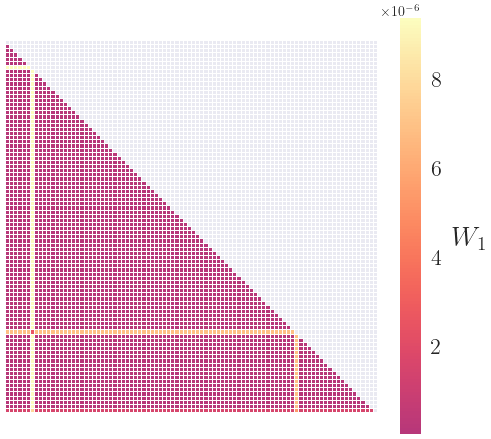

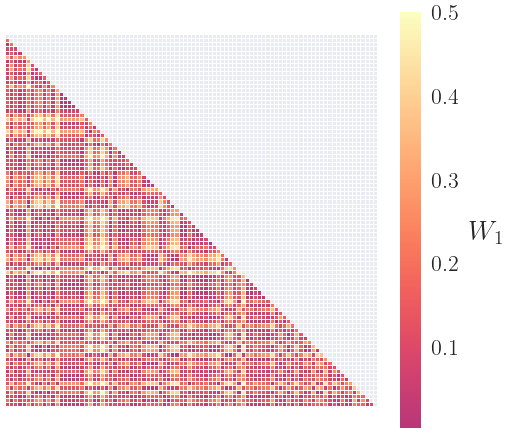

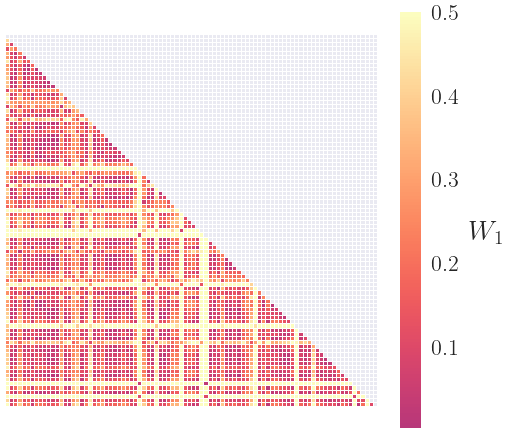

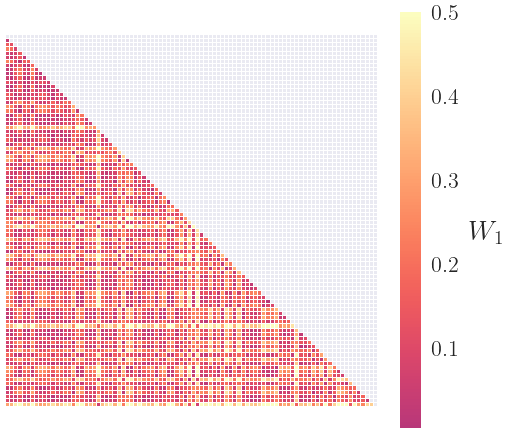

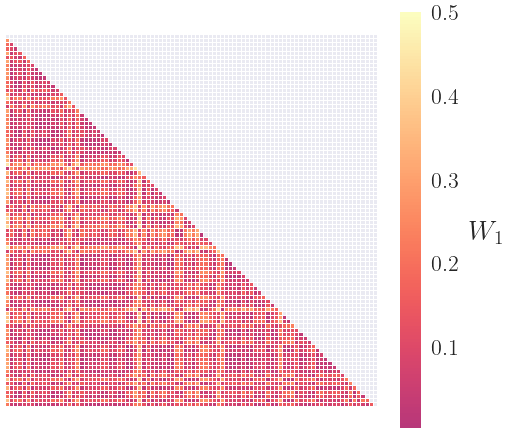

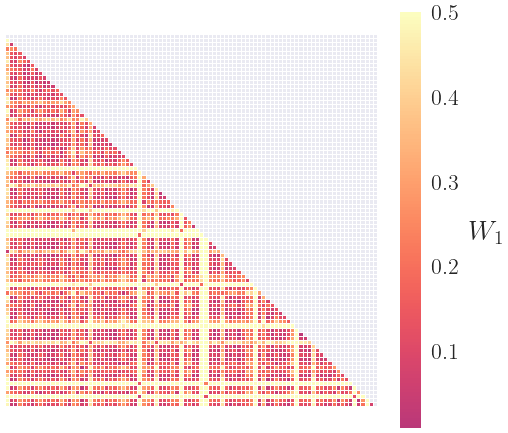

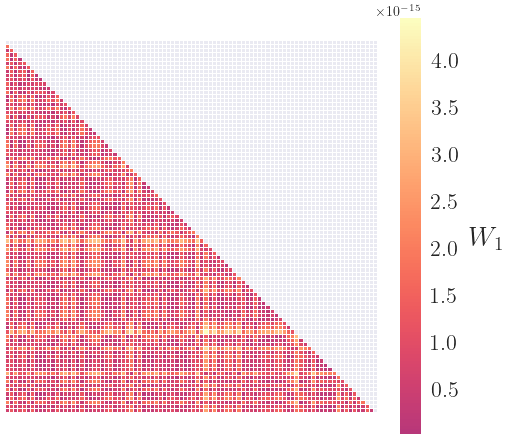

In [106]:
labels = ['$\Omega$','$\Phi_0$','$\psi$','$\iota$', '$\delta$','$\\alpha$','$h_0$']
#labels = ['$\Omega$','$\Omega$','$\Omega$','$\Omega$','$\Omega$','$\Omega$','$\Omega$']
use_axes_limits = [True,False,False,False,False,False,True]
for i in range(len(parameters)):
    plot_wasserstein_pairs(wasserstein_results,i,use_axes_limits=use_axes_limits[i],title=labels[i])